# Puzzle

https://thefiddler.substack.com/p/how-low-or-high-can-you-go

**This Week’s Fiddler**

From Alex Barnard comes a puzzle about game you can play using nothing but your favorite random number generator:

You’re playing a game of “high-low,” which proceeds as follows:

>    First, you are presented with a random number, x1, which is between 0 and 1.
>    A new number, x2, is about to be randomly selected between 0 and 1, independent of the first number. But before it’s selected, you must guess how x2 will compare to x1. If you think x2 will be greater than x1 you guess “high.” If you think x2 will be less than x1, you guess “low.” If you guess correctly, you earn a point and advance to the next round. Otherwise, the game is over.
>   If you correctly guessed how x2 compared to x1 then another random number, x3, will be selected between 0 and 1. This time, you must compare x3 to x2, guessing whether it will be “high” or “low.” If you guess correctly, you earn a point and advance to the next round. Otherwise, the game is over.

You continue playing as many rounds as you can, as long as you keep guessing correctly.

You quickly realize that the best strategy is to guess “high” whenever the previous number is less than 0.5, and “low” whenever the previous number is greater than 0.5.

With this strategy, what is the probability you will earn at least two points? That is, what are your chances of correctly comparing x2 to x1 and then also correctly comparing x3 to x2?


**This Week’s Extra Credit**

From Alex Barnard also comes some Extra Credit:

Your friend is playing an epic game of “high-low” and has made it incredibly far, having racked up a huge number of points.

Given this information, and only this information, what is the probability that your friend wins the next round of the game?

# Fiddler Solution

I am quite happy that I found a way to do this without resorting to integrals (anlytically or numerically).

We have 3 random variables. Each can be in the higher half (U for up) or lower half (D for down). So, we have 8 equally likely cases. In each case, it is easy to calculate the probability. When we transition from U to D or D to U, we are sure to guess correctly. If we stay in the same half (e.g. UUU), then we guess correctly only if the random variables are in a strict order (decreasing for UUU). Since all possible orderings of the three random variables is equally likely, and only one works, the probability of winning in this case is 1 / 3!. And similarly for the other cases.

- UUU : 1/6
- UUD : 1/2
- UDU : 1
- UDD : 1/2

And the other 4 cases are reflected versions of this.

- DUU : 1/2
- DUD : 1
- DDU : 1/2
- DDD : 1/6

So, the total probability is the average of either set of 4 = 1/4 * 13/6 = 13/24.

**The Fiddler Answer is 13/24**

# Extra Credit Solution

We need to find the prob of winning a point given that N points have been won.

Because P(A|B) = P(A&B)/P(B), this is equivalent to finding the probabilities of winning N points and taking the ratio of successive terms as N tends to Infinity.

While we can calculate the probability for each n following steps similar to the ones outlined above, I was not able to find a way to condense it into a general formula for all n. But we can write code to calculate some small values of n, and see how it does.

In [31]:
from math import factorial

def prod_factorial_run_lengths(nbits, val):
    """Compute the product of the factorials of the run lengths in the binary
    representation of case considered as a nbits bit integer.

    Args:
        nbits (int): The number of bits to consider.
        val (int): A positive integer.

    Returns:
        int: The product of the factorials of the run lengths.
    """
    if nbits <= 0 or val < 0 or val >= (1 << nbits):
        raise ValueError("Input must be a positive integer.")


    if True: # Slightly faster bitwise method
        v = val
        prod = 1
        for i in range(nbits):
            if v & 1:
                bit = 1
            else:
                bit = 0
            v >>= 1

            if i == 0:
                current_run_length = 1
                last_bit = bit
                run_lengths = []
            else:
                if bit == last_bit:
                    current_run_length += 1
                else:
                    prod *= factorial(current_run_length)
                    current_run_length = 1
                    last_bit = bit
        prod *= factorial(current_run_length)
        return prod
    else:
        binary_str = bin(val)[2:].zfill(nbits)  # Get binary representation without '0b' prefix
        run_lengths = []
        current_run_length = 1

        for i in range(1, len(binary_str)):
            if binary_str[i] == binary_str[i - 1]:
                current_run_length += 1
            else:
                run_lengths.append(current_run_length)
                current_run_length = 1

        run_lengths.append(current_run_length)  # Append the last run length

        product = 1
        for length in run_lengths:
            product *= factorial(length)

        return product

assert(prod_factorial_run_lengths(6, 49) == 12) 
# 49 is 110001 in binary, runs are 11, 000, 1 -> 2!, 3!, 1! = 2 * 6 * 1 = 12

In [45]:
from fractions import Fraction as Fr
def p_all_wins(n, exact=False):
    """
      n : number of random variables. Max score is n-1.
      exact : if True, return exact probability as a Fraction.
    """
    # Halve the range because of symmetry
    num_cases = 1 << (n - 1)  # 2^(n-1)
    prob_sum = 0
    for i in range(num_cases):
        pfrl = prod_factorial_run_lengths(n, i)
        prob_sum += Fr(1, pfrl) if exact else 1/pfrl
    average_prob = Fr(prob_sum, num_cases) if exact else prob_sum / num_cases
    return average_prob

Fiddler_Answer = p_all_wins(3, exact=True)
print(f" Fiddler Answer is {Fiddler_Answer} = {float(Fiddler_Answer)}")  # Exact probability as a fraction


 Fiddler Answer is 13/24 = 0.5416666666666666


In [33]:
import time
for e in [True]: # Exact is not much slower than float, so just do exact
    max_n = 25
    print(f"\nExact = {e}, max_n = {max_n}")
    P_list = [1]
    Q_list = []
    for i in range(2, max_n + 1):
        start_time = time.time()
        p = p_all_wins(i, exact=e)
        P_list.append(p)
        q = P_list[-1]/P_list[-2]
        Q_list.append(q)
        end_time = time.time()
        print(f"n={i}, qf={float(q)}, q={q}, time={(end_time - start_time):.4f} seconds")



Exact = True, max_n = 25
n=2, qf=0.75, q=3/4, time=0.0010 seconds
n=3, qf=0.7222222222222222, q=13/18, time=0.0000 seconds
n=4, qf=0.7211538461538461, q=75/104, time=0.0000 seconds
n=5, qf=0.7213333333333334, q=541/750, time=0.0000 seconds
n=6, qf=0.7213493530499075, q=1561/2164, time=0.0000 seconds
n=7, qf=0.7213477319178793, q=47293/65562, time=0.0011 seconds
n=8, qf=0.721347503858922, q=545835/756688, time=0.0000 seconds
n=9, qf=0.7213475175139414, q=7087261/9825030, time=0.0010 seconds
n=10, qf=0.7213475205724751, q=102247563/141745220, time=0.0020 seconds
n=11, qf=0.7213475204827575, q=1622632573/2249446386, time=0.0040 seconds
n=12, qf=0.7213475204438657, q=9363855865/12981060584, time=0.0054 seconds
n=13, qf=0.7213475204440069, q=526858348381/730380757470, time=0.0110 seconds
n=14, qf=0.7213475204444777, q=10641342970443/14752033754668, time=0.0281 seconds
n=15, qf=0.7213475204444874, q=230283190977853/319240289113290, time=0.0403 seconds
n=16, qf=0.7213475204444819, q=53156546

The decimal values have converged, and rather quickly too.

**So, the Extra Credit answer is 0.7213475204444817**

Now some plots to see things a bit more visually...

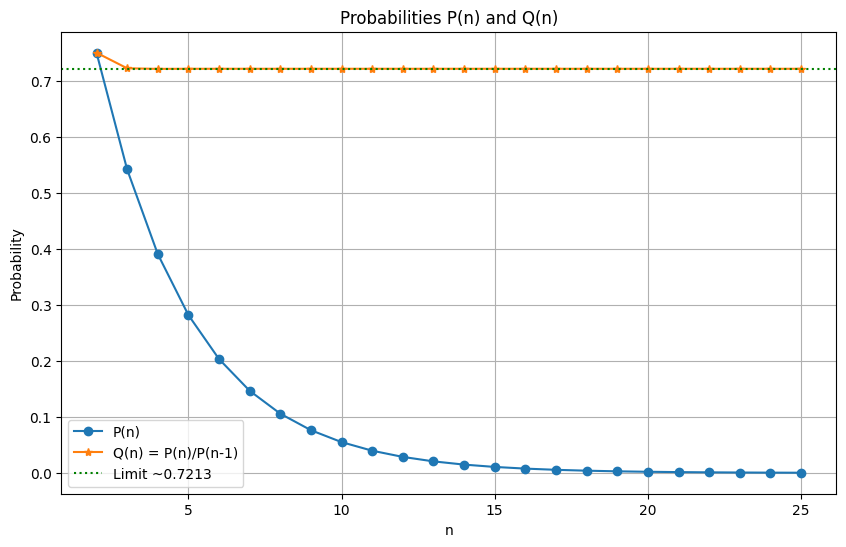

In [44]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Set figure size
plt.plot(range(2, max_n + 1), [float(p) for p in P_list[1:]], marker='o', label='P(n)')
plt.plot(range(2, max_n + 1), [float(q) for q in Q_list], marker='*', label='Q(n) = P(n)/P(n-1)')
#plt.yscale('log') # Logarithmic scale for y-axis
plt.axhline(y=0.7213475204444817, color='g', linestyle=':', label='Limit ~0.7213')
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probabilities P(n) and Q(n)')
plt.legend()
plt.grid()
plt.show()


Some google searching and evalulation reveals that $0.7213475204444817 = 1/ln(4) = log_{4}(e)$. 
Not really sure how that comes about in this problem, but good to know.

UPDATE: Official Solution -> https://thefiddler.substack.com/p/can-you-box-the-letters